<div class = "page-header">
    <h1 class = "alert alert-info">
    Study of standard unsupervised clustering techniques<br/>
    <small>
        Henrique Gasparini Fiuza do Nascimento - started: 04/02/2017<br/>
    </small>
    </h1> 
</div>

<div class="alert alert-success">
    <h2>
        Imports
    </h2>
</div>
<h4 class="alert alert-warning">Importing libraries and checking working directory</h4>

In [67]:
import pandas as pd
import numpy as np

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab


#import libraries for features decomposition
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

#Visualization param
pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h4 class="alert alert-warning">Actually importing the data</h4>

Deciding which data to work with was not straightforward. While the paper used players statistics in a per minutes basis, we decided to use them in absolute values. This decisions came from the poor results obtained in PCA and in the evaluation of these methods by some well-known criteria, like random index and the silhouette score.

In [68]:
#import data
df = pd.read_csv('../../../Data/NBA-data-With-Positions.csv')
print "(rows,cols) =",df.shape
df.head(5)

(rows,cols) = (476, 31)


,Unnamed: 0,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,PosicAbbrev,SALARY
0,0,Aaron Brooks,CHI,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,35.7,0.7,0.9,76.6,0.3,1.2,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1,PG,2250000
1,1,Aaron Gordon,ORL,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,29.6,1.7,2.5,66.8,2.0,4.5,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0,PF,4171680
2,2,Aaron Harrison,CHA,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,30.0,0.2,0.6,41.7,0.2,0.5,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3,SG,525093
3,3,Adreian Payne,MIN,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,28.1,0.3,0.5,65.4,0.4,1.8,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3,PF,1938840
4,4,Al Horford,ATL,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,34.4,1.3,1.6,79.8,1.8,5.5,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8,C,12000000


In [69]:
df.describe()

,Unnamed: 0,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,SALARY
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,4.760000e+02
mean,237.500000,27.052521,54.785714,27.464286,27.321429,20.157773,3.113235,6.951681,44.315966,0.688025,1.963655,27.020588,1.434874,1.911555,71.973319,0.870378,2.754832,3.620588,1.826261,1.146849,0.653361,0.415126,1.744538,4.424370,0.157563,8.349370,-0.399790,4.804590e+06
std,137.553626,4.407574,24.274576,16.478017,15.219228,9.223976,2.053724,4.420890,8.783619,0.713570,1.862574,16.227345,1.307888,1.652358,17.903679,0.775428,1.769210,2.407671,1.756553,0.782957,0.438861,0.448180,0.742706,9.506151,1.136183,5.652556,3.077754,5.311455e+06
min,0.000000,19.000000,1.000000,0.000000,0.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,3.088800e+04
25%,118.750000,24.000000,37.000000,14.000000,15.000000,13.000000,1.500000,3.500000,40.400000,0.100000,0.300000,20.000000,0.575000,0.800000,66.700000,0.300000,1.500000,1.900000,0.675000,0.600000,0.300000,0.100000,1.200000,0.000000,0.000000,4.000000,-2.000000,1.140240e+06
50%,237.500000,26.000000,62.000000,28.000000,28.000000,19.950000,2.700000,5.950000,43.900000,0.500000,1.500000,32.350000,1.000000,1.400000,75.400000,0.600000,2.350000,3.100000,1.300000,0.900000,0.600000,0.300000,1.800000,0.000000,0.000000,7.000000,-0.500000,2.614748e+06
75%,356.250000,30.000000,76.000000,40.000000,38.000000,28.025000,4.400000,9.600000,48.200000,1.100000,3.125000,36.725000,1.900000,2.600000,82.600000,1.200000,3.600000,4.800000,2.325000,1.500000,0.900000,0.500000,2.200000,4.000000,0.000000,11.625000,1.100000,6.277500e+06
max,475.000000,40.000000,82.000000,73.000000,71.000000,42.400000,10.200000,20.500000,100.000000,5.100000,11.200000,100.000000,8.800000,10.200000,100.000000,4.900000,10.300000,14.800000,11.700000,4.600000,2.100000,3.700000,6.000000,66.000000,18.000000,30.100000,13.200000,2.500000e+07


<h4 class="alert alert-warning">Saving positions numbers</h4>

In [70]:
dict = {' PG': 0, ' PF': 1, ' SG' : 0, ' SF' : 1, ' C' : 2}
invdict = {0 : 'G', 1 : 'F', 2 : 'C'}

actual_positions = [dict[x] for x in df['PosicAbbrev']]
df = df.select_dtypes(include=['number']).drop(['Unnamed: 0'], 1)

In [71]:
df.head(5)

,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,SALARY
0,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,35.7,0.7,0.9,76.6,0.3,1.2,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1,2250000
1,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,29.6,1.7,2.5,66.8,2.0,4.5,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0,4171680
2,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,30.0,0.2,0.6,41.7,0.2,0.5,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3,525093
3,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,28.1,0.3,0.5,65.4,0.4,1.8,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3,1938840
4,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,34.4,1.3,1.6,79.8,1.8,5.5,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8,12000000


<h4 class="alert alert-warning">Scaling data</h4>

In [72]:
cols = df.columns
df = sk.preprocessing.scale(df)
df = pd.DataFrame(df, columns=cols)

<div class="alert alert-success">
    <h2>
        Feature Selection
    </h2>
</div>
<h4 class="alert alert-warning">We remind the sets of selected features and build sub-dataframes for each of them</h4>

In [73]:
laplacian_score_features = [u'TD3', u'03:00:00 PM', u'3P%', u'PTS', u'FGM', u'3PA', u'FG%']
spec_features = [u'+/-', u'PF', u'STL', u'AGE', u'BLK', u'OREB', u'TOV']
mcfs_features = [u'OREB', u'DREB', u'STL', u'3PA', u'PF', u'+/-', u'AGE']
papers_features = ['REB','AST','TOV','STL','BLK','PF','PTS']

In [74]:
laplacian_df = df[laplacian_score_features]
spec_df = df[spec_features]
mcfs_df = df[mcfs_features]
papers_df = df[papers_features]

<div class="alert alert-success">
    <h2>
        Clustering Analysis
    </h2>
</div>

<h4 class="alert alert-warning">1 - KMeans</h4>

In [75]:
from sklearn.cluster import KMeans
def getKMeansLabels(df):
    estimator = KMeans(n_clusters=5)
    estimator.fit(df)
    return estimator.labels_

In [76]:
labels_set = {}
labels_set['Laplacian - KMeans'] = getKMeansLabels(laplacian_df)
labels_set['SPEC - KMeans'] = getKMeansLabels(spec_df)
labels_set['MCFS - KMeans'] = getKMeansLabels(mcfs_df)
labels_set['Paper - KMeans'] = getKMeansLabels(papers_df)
labels_set['All - KMeans'] = getKMeansLabels(df)

<h4 class="alert alert-warning">1.1 - Compute scores</h4>

In [77]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score, accuracy_score
from itertools import permutations

In [78]:
# determines the permutation of labels that produce the best accuracy
def accuracy(labels_1, labels_2):
    k = len(np.unique(labels_2))
    best_score = -1
    for p in permutations(range(k), k):
        cur_score = sum([l1==p[l2] for l1,l2 in zip(labels_1, labels_2)])
        best_score = max(best_score, cur_score)
    return best_score/float(len(labels_1))

In [79]:
print "Accuracies:"
for k, v in labels_set.iteritems():
    print k, accuracy(v, actual_positions)

Accuracies:
SPEC - KMeans 0.281512605042
All - KMeans 0.363445378151
Paper - KMeans 0.331932773109
MCFS - KMeans 0.283613445378
Laplacian - KMeans 0.422268907563


In [80]:
print "Accuracy scores - Jaccard similarity score:"
for k, v in labels_set.iteritems():
    print k, accuracy_score(v, actual_positions)

Accuracy scores - Jaccard similarity score:
SPEC - KMeans 0.281512605042
All - KMeans 0.155462184874
Paper - KMeans 0.331932773109
MCFS - KMeans 0.182773109244
Laplacian - KMeans 0.117647058824


In [81]:
print "Random Index scores:"
for k,v in labels_set.iteritems():
    print k, adjusted_rand_score(v, actual_positions)

Random Index scores:
SPEC - KMeans 0.0530620104233
All - KMeans 0.0593832658784
Paper - KMeans 0.0645694610953
MCFS - KMeans 0.0397152615625
Laplacian - KMeans 0.106583849052


In [82]:
print "Silhouette scores:"
for k, v in labels_set.iteritems():
    print k, silhouette_score(df, v)

Silhouette scores:
SPEC - KMeans 0.0853684476843
All - KMeans 0.164316697169
Paper - KMeans 0.0996961591474
MCFS - KMeans 0.0855303755098
Laplacian - KMeans 0.09777286531


<h4 class="alert alert-warning">1.2 - Plotting</h4>

In [83]:
def plotClustering(df, labels, legend, dim=2):
    df_scaled = sk.preprocessing.scale(df)
    pca = sk.decomposition.PCA(n_components=10, whiten=True)
    df_red = pca.fit_transform(df_scaled)

    if dim==3:
        #print pca.explained_variance_ratio_
        #print "variance sum =",sum(pca.explained_variance_ratio_)    
        fig = plt.figure(1, figsize=(4, 3))
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
        ax.scatter(df_red[:, 0], df_red[:, 1], df_red[:, 2], c=labels)    
        return

    statesN = [0,1,2]
    states = [invdict[x] for x in statesN]
    states    
    import matplotlib.patches as mpatches
    pylab.title("Performing PCA\n"+legend)
    pylab.xlabel("Dim 1")
    pylab.ylabel("Dim 2")
    #pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)

    states = [invdict[x] for x in [0,1,2]]
    for i,l in enumerate(states):
        x = []
        y = []
        for j,_ in enumerate(df_red[:, 0]):
            if labels[j] == i+1:
                x.append(df_red[j,0])
                y.append(df_red[j,1])
        pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

    pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
    pylab.show()


    pylab.title("Explained variance ratio\n"+legend) 
    pylab.xlabel("Dim 1")
    pylab.ylabel("Dim 2")
    pylab.ylim(0,.45)
    x_axis =[x+.5 for x in range(len(pca.explained_variance_ratio_))]
    pylab.bar(x_axis,pca.explained_variance_ratio_)
    

In [84]:
print "Plotting:"
for k,v in labels_set.iteritems():
    print k

Plotting:
SPEC - KMeans
All - KMeans
Paper - KMeans
MCFS - KMeans
Laplacian - KMeans


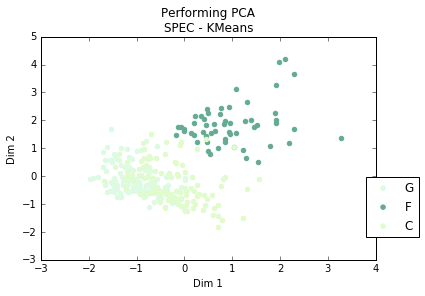

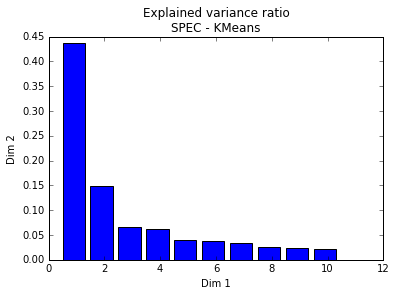

In [85]:
plotClustering(df, labels_set['SPEC - KMeans'], 'SPEC - KMeans')

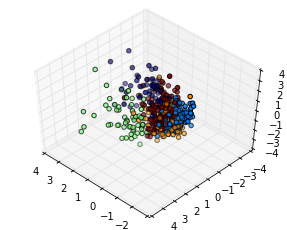

In [86]:
plotClustering(df, labels_set['SPEC - KMeans'], 'SPEC - KMeans', dim=3)

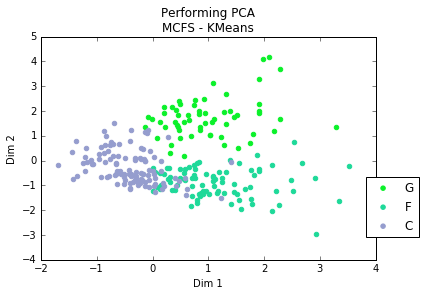

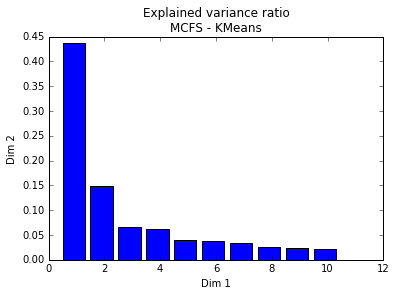

In [87]:
plotClustering(df, labels_set['MCFS - KMeans'], 'MCFS - KMeans')

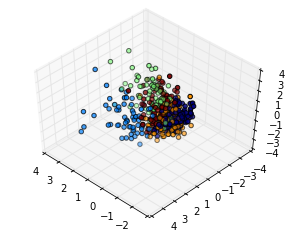

In [88]:
plotClustering(df, labels_set['MCFS - KMeans'], 'MCFS - KMeans', dim=3)

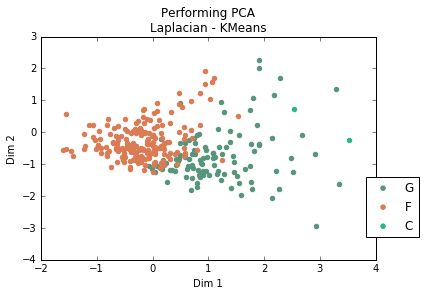

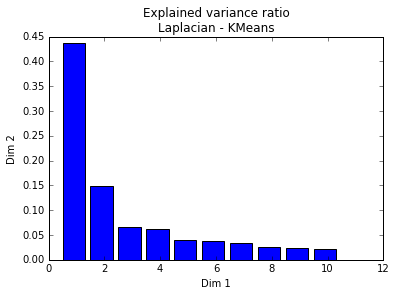

In [89]:
plotClustering(df, labels_set['Laplacian - KMeans'], 'Laplacian - KMeans')

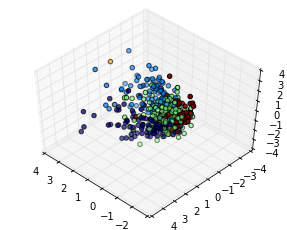

In [90]:
plotClustering(df, labels_set['Laplacian - KMeans'], 'Laplacian - KMeans', dim=3)

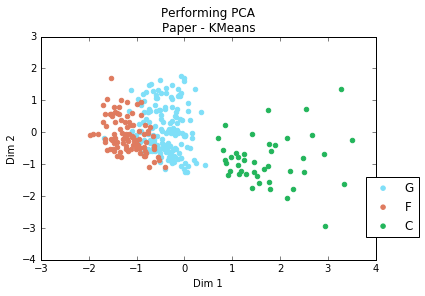

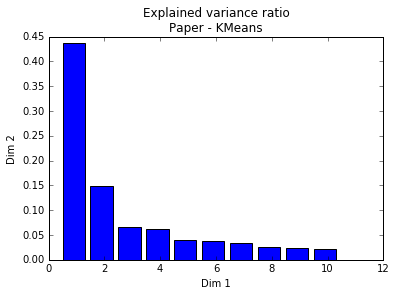

In [91]:
plotClustering(df, labels_set['Paper - KMeans'], 'Paper - KMeans')

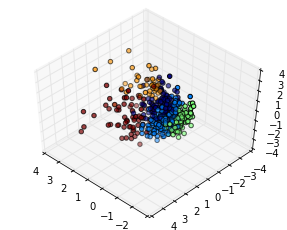

In [92]:
plotClustering(df, labels_set['Paper - KMeans'], 'Paper - KMeans', dim=3)

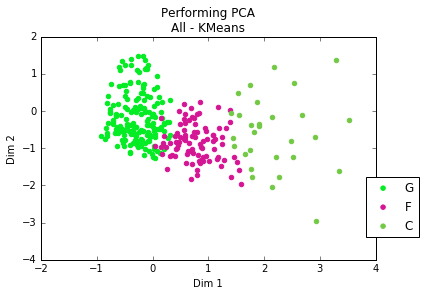

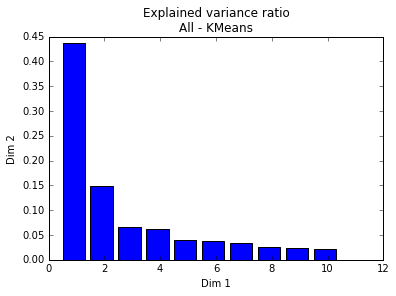

In [93]:
plotClustering(df, labels_set['All - KMeans'], 'All - KMeans')

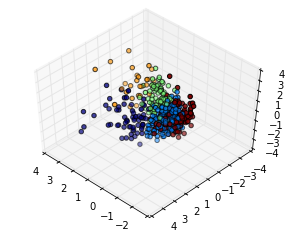

In [94]:
plotClustering(df, labels_set['All - KMeans'], 'All - KMeans', dim=3)

<h4 class="alert alert-warning">2 - Agglomerative Clustering</h4>

In [95]:
from sklearn.cluster import AgglomerativeClustering
def getAgglomerativeLabels(df, linkage):
    model = AgglomerativeClustering(linkage=linkage, n_clusters=5)
    model.fit(df)
    return model.labels_

In [96]:
linkages = ['ward', 'average', 'complete']
labels_set = {}

for li in linkages:
    labels_set['Laplacian - Agglomerative - '+li] = getAgglomerativeLabels(laplacian_df, li)
for li in linkages:
    labels_set['SPEC - Agglomerative - '+li] = getAgglomerativeLabels(spec_df, li)
for li in linkages:
    labels_set['MCFS - Agglomerative - '+li] = getAgglomerativeLabels(mcfs_df, li)
for li in linkages:
    labels_set['Paper - Agglomerative - '+li] = getAgglomerativeLabels(papers_df, li)
for li in linkages:
    labels_set['All - Agglomerative - '+li] = getAgglomerativeLabels(df, li)

<h4 class="alert alert-warning">2.1 - Compute scores</h4>

In [97]:
print "Accuracies:"
for k, v in labels_set.iteritems():
    print k, accuracy(v, actual_positions)

Accuracies:
SPEC - Agglomerative - complete 0.378151260504
SPEC - Agglomerative - average 0.426470588235
SPEC - Agglomerative - ward 0.415966386555
Laplacian - Agglomerative - ward 0.451680672269
MCFS - Agglomerative - ward 0.323529411765
Paper - Agglomerative - complete 0.245798319328
All - Agglomerative - ward 0.281512605042
Paper - Agglomerative - average 0.428571428571
MCFS - Agglomerative - complete 0.460084033613
Paper - Agglomerative - ward 0.317226890756
Laplacian - Agglomerative - complete 0.489495798319
Laplacian - Agglomerative - average 0.420168067227
All - Agglomerative - complete 0.441176470588
All - Agglomerative - average 0.420168067227
MCFS - Agglomerative - average 0.432773109244


In [98]:
print "Accuracy scores - Jaccard similarity score:"
for k, v in labels_set.iteritems():
    print k, accuracy_score(v, actual_positions)

Accuracy scores - Jaccard similarity score:
SPEC - Agglomerative - complete 0.28781512605
SPEC - Agglomerative - average 0.426470588235
SPEC - Agglomerative - ward 0.323529411765
Laplacian - Agglomerative - ward 0.451680672269
MCFS - Agglomerative - ward 0.323529411765
Paper - Agglomerative - complete 0.0210084033613
All - Agglomerative - ward 0.147058823529
Paper - Agglomerative - average 0.424369747899
MCFS - Agglomerative - complete 0.460084033613
Paper - Agglomerative - ward 0.165966386555
Laplacian - Agglomerative - complete 0.439075630252
Laplacian - Agglomerative - average 0.420168067227
All - Agglomerative - complete 0.317226890756
All - Agglomerative - average 0.168067226891
MCFS - Agglomerative - average 0.394957983193


In [99]:
print "Random Index scores:"
for k,v in labels_set.iteritems():
    print k, adjusted_rand_score(v, actual_positions)

Random Index scores:
SPEC - Agglomerative - complete 0.0363238050763
SPEC - Agglomerative - average -0.00197943014263
SPEC - Agglomerative - ward 0.0660689607044
Laplacian - Agglomerative - ward 0.0969190587766
MCFS - Agglomerative - ward 0.0657333672162
Paper - Agglomerative - complete 0.108286109937
All - Agglomerative - ward 0.0435725183228
Paper - Agglomerative - average 0.0155065667939
MCFS - Agglomerative - complete 0.0348779906313
Paper - Agglomerative - ward 0.0466156937685
Laplacian - Agglomerative - complete 0.161804185864
Laplacian - Agglomerative - average -0.00655515279882
All - Agglomerative - complete 0.00639227952563
All - Agglomerative - average 0.010791959969
MCFS - Agglomerative - average -0.00440814939746


In [100]:
print "Silhouette scores:"
for k, v in labels_set.iteritems():
    print k, silhouette_score(df, v)

Silhouette scores:
SPEC - Agglomerative - complete 0.0886329543251
SPEC - Agglomerative - average 0.357396438833
SPEC - Agglomerative - ward 0.059885403925
Laplacian - Agglomerative - ward 0.112321708826
MCFS - Agglomerative - ward 0.0760060034891
Paper - Agglomerative - complete 0.18528978718
All - Agglomerative - ward 0.106692853622
Paper - Agglomerative - average 0.356974595551
MCFS - Agglomerative - complete 0.173946290812
Paper - Agglomerative - ward 0.095094099128
Laplacian - Agglomerative - complete 0.0804295566668
Laplacian - Agglomerative - average 0.259525327151
All - Agglomerative - complete 0.201455766694
All - Agglomerative - average 0.363579441735
MCFS - Agglomerative - average 0.252664002474


In [101]:
print "Plotting:"
for k,v in labels_set.iteritems():
    print k
    

Plotting:
SPEC - Agglomerative - complete
SPEC - Agglomerative - average
SPEC - Agglomerative - ward
Laplacian - Agglomerative - ward
MCFS - Agglomerative - ward
Paper - Agglomerative - complete
All - Agglomerative - ward
Paper - Agglomerative - average
MCFS - Agglomerative - complete
Paper - Agglomerative - ward
Laplacian - Agglomerative - complete
Laplacian - Agglomerative - average
All - Agglomerative - complete
All - Agglomerative - average
MCFS - Agglomerative - average


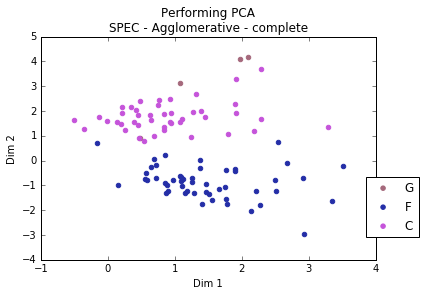

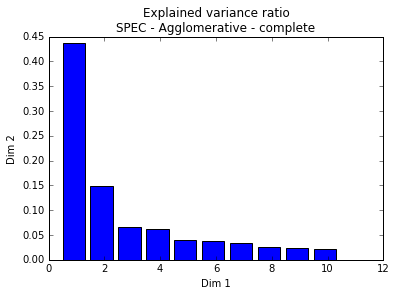

In [102]:
plotClustering(df, labels_set['SPEC - Agglomerative - complete'], 'SPEC - Agglomerative - complete')

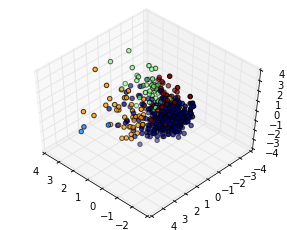

In [103]:
plotClustering(df, labels_set['SPEC - Agglomerative - complete'], 'SPEC - Agglomerative - complete', dim=3)

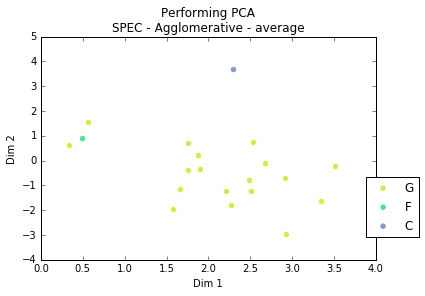

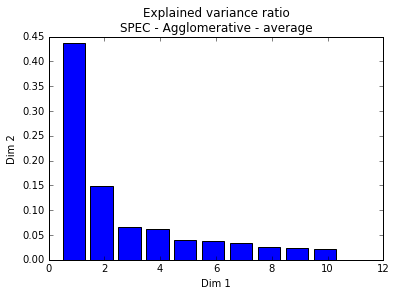

In [104]:
plotClustering(df, labels_set['SPEC - Agglomerative - average'], 'SPEC - Agglomerative - average')

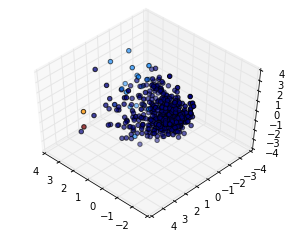

In [105]:
plotClustering(df, labels_set['SPEC - Agglomerative - average'], 'SPEC - Agglomerative - average', dim=3)

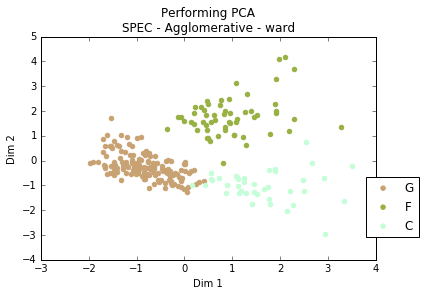

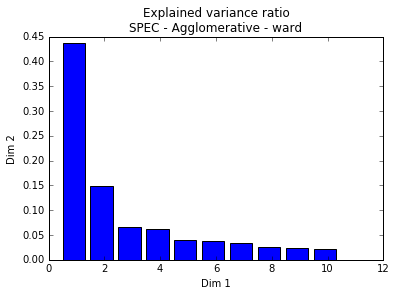

In [106]:
plotClustering(df, labels_set['SPEC - Agglomerative - ward'], 'SPEC - Agglomerative - ward')

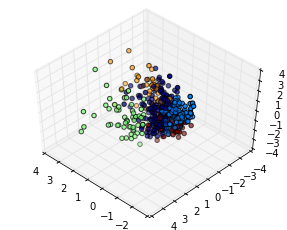

In [107]:
plotClustering(df, labels_set['SPEC - Agglomerative - ward'], 'SPEC - Agglomerative - ward', dim=3)

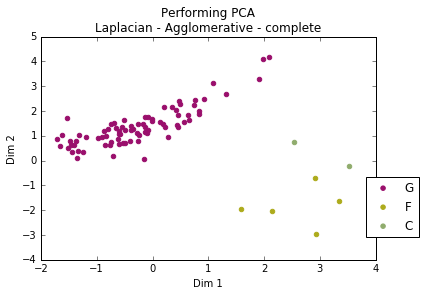

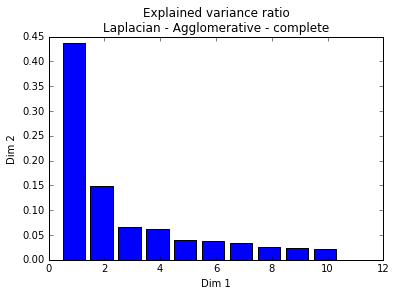

In [108]:
plotClustering(df, labels_set['Laplacian - Agglomerative - complete'], 'Laplacian - Agglomerative - complete')

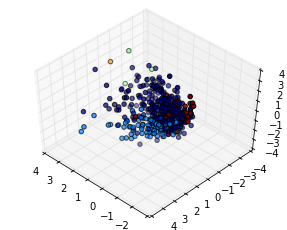

In [109]:
plotClustering(df, labels_set['Laplacian - Agglomerative - complete'], 'Laplacian - Agglomerative - complete', dim=3)

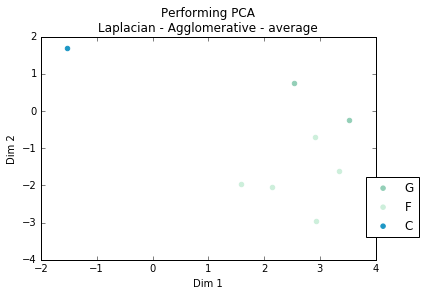

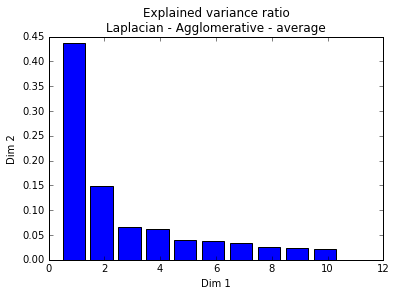

In [110]:
plotClustering(df, labels_set['Laplacian - Agglomerative - average'], 'Laplacian - Agglomerative - average')

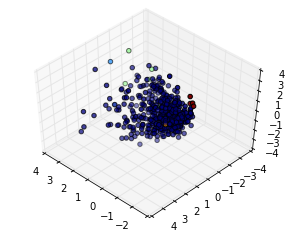

In [111]:
plotClustering(df, labels_set['Laplacian - Agglomerative - average'], 'Laplacian - Agglomerative - average', dim=3)

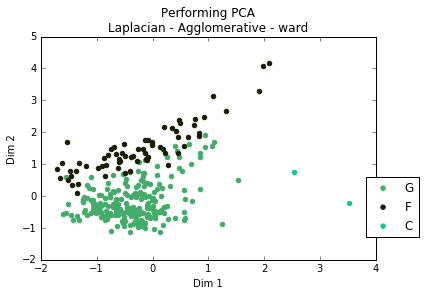

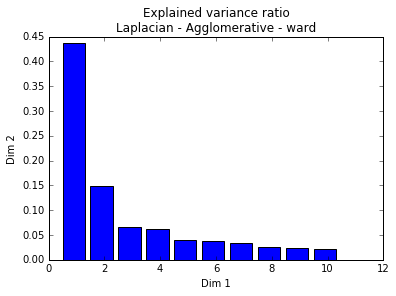

In [112]:
plotClustering(df, labels_set['Laplacian - Agglomerative - ward'], 'Laplacian - Agglomerative - ward')

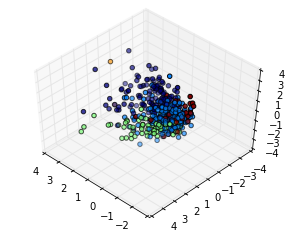

In [113]:
plotClustering(df, labels_set['Laplacian - Agglomerative - ward'], 'Laplacian - Agglomerative - ward', dim=3)

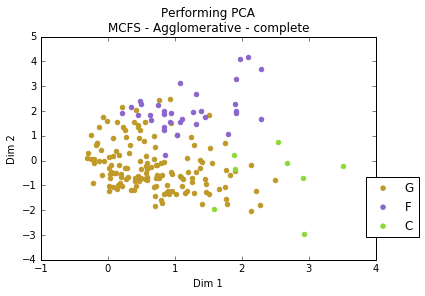

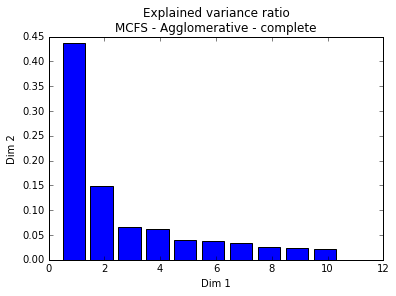

In [114]:
plotClustering(df, labels_set['MCFS - Agglomerative - complete'], 'MCFS - Agglomerative - complete')

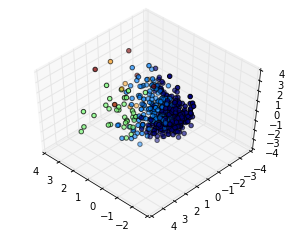

In [115]:
plotClustering(df, labels_set['MCFS - Agglomerative - complete'], 'MCFS - Agglomerative - complete', dim=3)

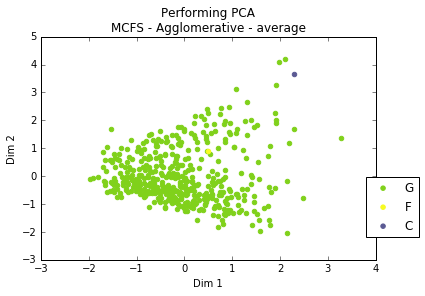

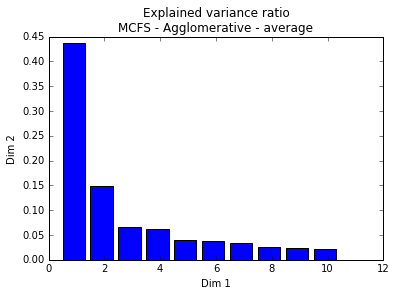

In [116]:
plotClustering(df, labels_set['MCFS - Agglomerative - average'], 'MCFS - Agglomerative - average')

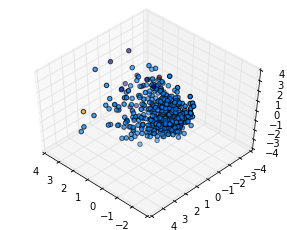

In [117]:
plotClustering(df, labels_set['MCFS - Agglomerative - average'], 'MCFS - Agglomerative - average', dim=3)

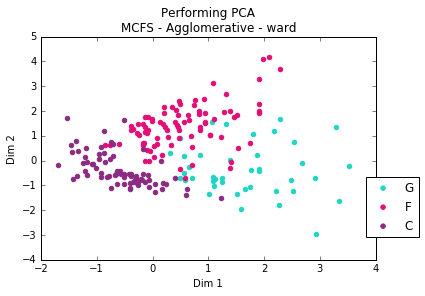

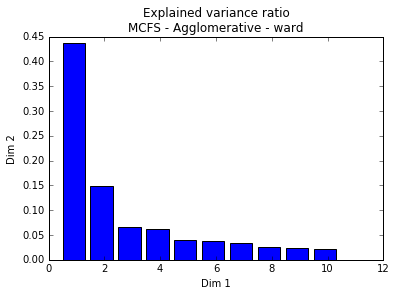

In [118]:
plotClustering(df, labels_set['MCFS - Agglomerative - ward'], 'MCFS - Agglomerative - ward')

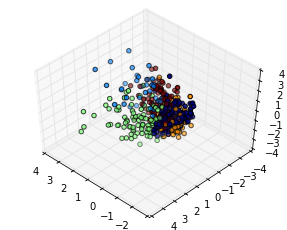

In [119]:
plotClustering(df, labels_set['MCFS - Agglomerative - ward'], 'MCFS - Agglomerative - ward', dim=3)

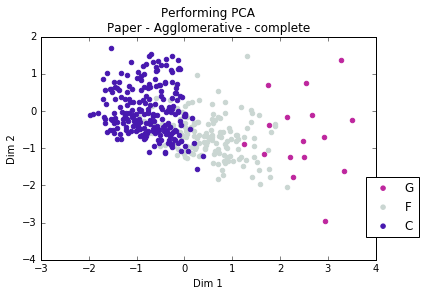

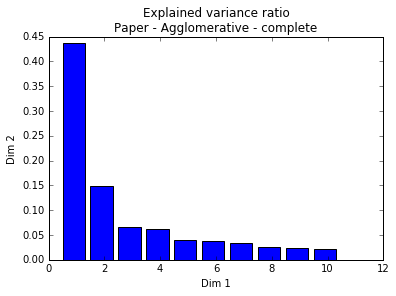

In [120]:
plotClustering(df, labels_set['Paper - Agglomerative - complete'], 'Paper - Agglomerative - complete')

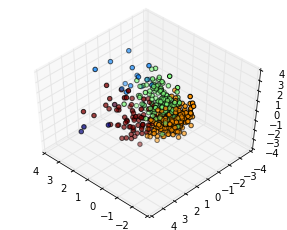

In [121]:
plotClustering(df, labels_set['Paper - Agglomerative - complete'], 'Paper - Agglomerative - complete', dim=3)

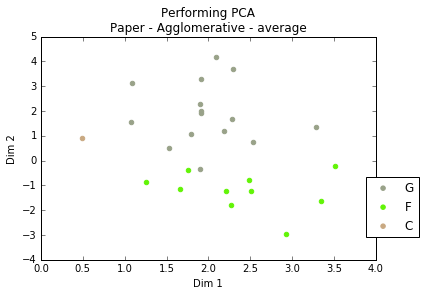

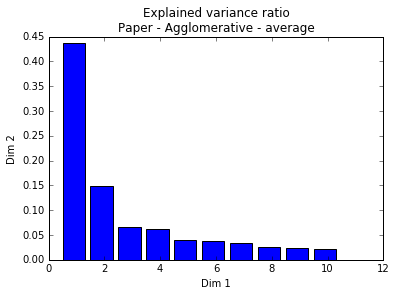

In [122]:
plotClustering(df, labels_set['Paper - Agglomerative - average'], 'Paper - Agglomerative - average')

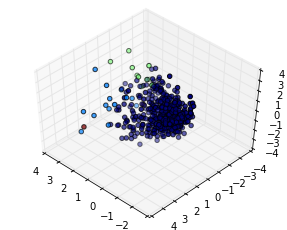

In [123]:
plotClustering(df, labels_set['Paper - Agglomerative - average'], 'Paper - Agglomerative - average', dim=3)

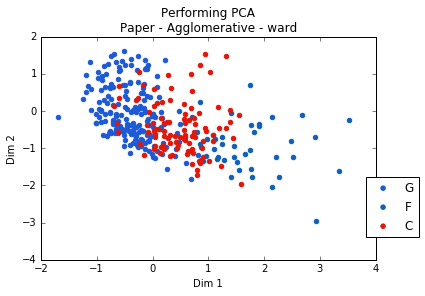

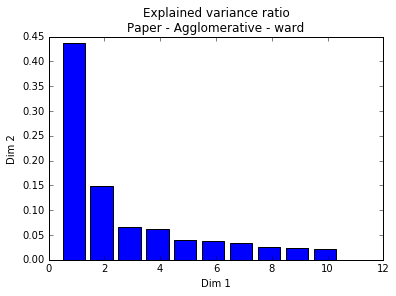

In [124]:
plotClustering(df, labels_set['Paper - Agglomerative - ward'], 'Paper - Agglomerative - ward')

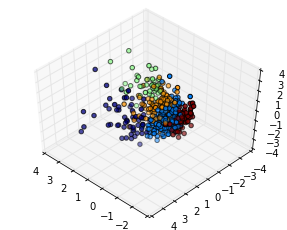

In [125]:
plotClustering(df, labels_set['Paper - Agglomerative - ward'], 'Paper - Agglomerative - ward', dim=3)

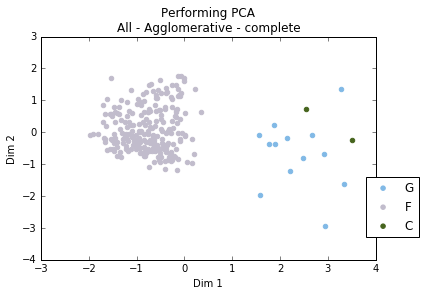

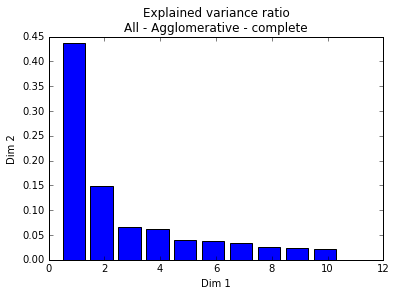

In [126]:
plotClustering(df, labels_set['All - Agglomerative - complete'], 'All - Agglomerative - complete')

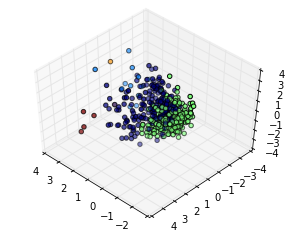

In [127]:
plotClustering(df, labels_set['All - Agglomerative - complete'], 'All - Agglomerative - complete', dim=3)

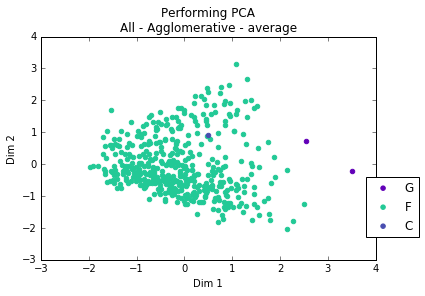

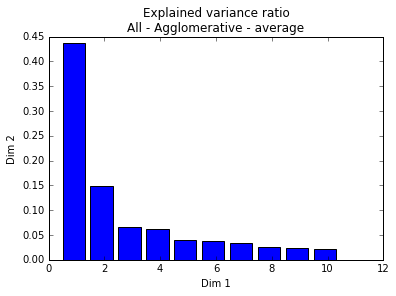

In [128]:
plotClustering(df, labels_set['All - Agglomerative - average'], 'All - Agglomerative - average')

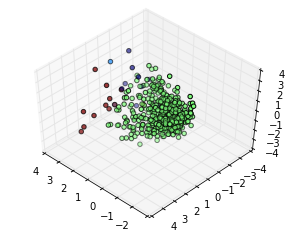

In [129]:
plotClustering(df, labels_set['All - Agglomerative - average'], 'All - Agglomerative - average', dim=3)

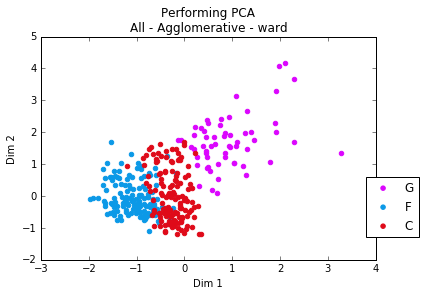

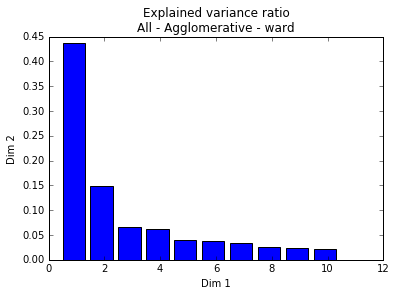

In [130]:
plotClustering(df, labels_set['All - Agglomerative - ward'], 'All - Agglomerative - ward')

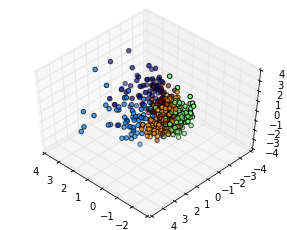

In [131]:
plotClustering(df, labels_set['All - Agglomerative - ward'], 'All - Agglomerative - ward', dim=3)

<div class="alert alert-success">
    <h2>
        ANALYSIS
    </h2>
</div>

When we assumed that there were only three positions, our prediction accuracies increased a lot. Our best result was obtained using the features obtained by the Laplacian score method and agglomerative clustering with complete linkage as the clustering mmethod: 48.95% of accuracy. This result can also be observed in the 2D and 3D visualizations that we plotted.

Using all the features or only the features cited in the paper also produced almost equally good results.

Other metrics, such as the random index and the silhouette score remained low.

To put it in a nutshell, reducing the number of expected positions was key to improve accuracy. On the one hand. features obtained through the Laplacian score method continued to produced the best results. On the other hand, using all the features and only the features from paper also produced good results